In [1]:
# import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# Load MNIST dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### EDA

In [3]:
# Train data shape
x_train.shape

(60000, 28, 28)

In [4]:
# visualize single image
single_image = x_train[0]
single_image   # 28*28 pixel means: 28 rows and 28 cols matrix

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

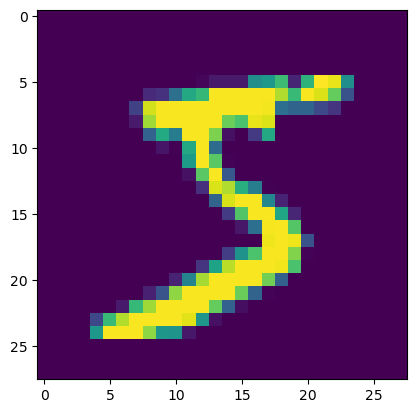

In [5]:
plt.imshow(single_image)

## Preprocessing

In [6]:
# Labels

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
# Keras has simple way to do One-hot Encoding
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_test = to_categorical(y_test,10)

y_cat_train = to_categorical(y_train,10)

# Output should be Train (60000,10) and Test (10000,10)

print("Train label sizes: ", y_cat_train.shape)
print("Test label sizes: ", y_cat_test.shape)

Train label sizes:  (60000, 10)
Test label sizes:  (10000, 10)


In [10]:
#Should Normalize X data

#value = value/255

In [11]:
single_image.max()    # We bind values from 0 to 1

255

In [12]:
#Scaled
x_train = x_train/255
y_train = y_train/255

In [13]:
x_train[0].max()   # previous it was 255 and now 1. That's grt !!!!

1.0

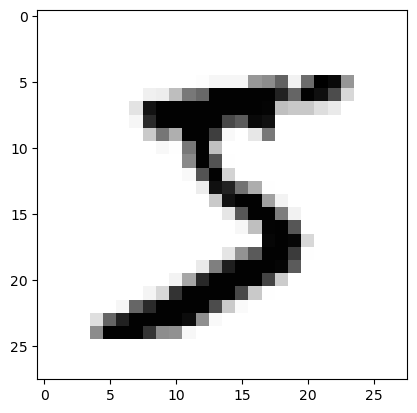

In [14]:
image = x_train[0]
plt.imshow(image, cmap='Greys')

### Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train = x_train.reshape(60000, 28, 28, 1)        #add new dimension for color channel
x_test = x_test.reshape(10000,28,28,1)

x_train.shape

(60000, 28, 28, 1)

### Model Creation

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [18]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES : Multi class classification
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1351 - accuracy: 0.9596 - val_loss: 15.0762 - val_accuracy: 0.9694
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0475 - accuracy: 0.9850 - val_loss: 26.4443 - val_accuracy: 0.9580
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 18.5301 - val_accuracy: 0.9698


In [21]:
#evaluate Model
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.135146,0.959633,15.076158,0.9694
1,0.047509,0.984950,26.444290,0.9580
2,0.029821,0.990683,18.530069,0.9698


<AxesSubplot:>

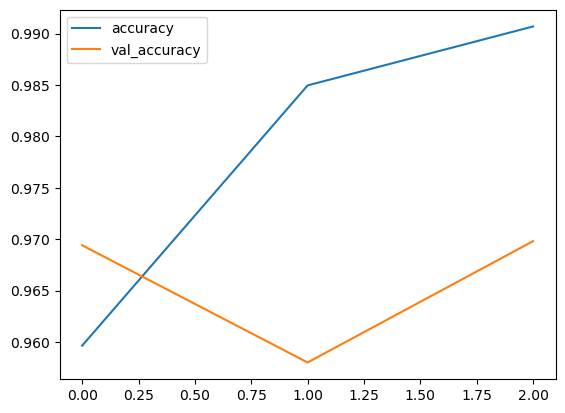

In [22]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

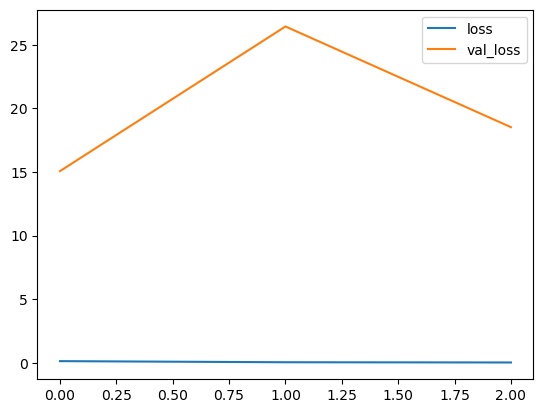

In [23]:
losses[['loss','val_loss']].plot()

In [24]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[18.53006935119629, 0.9697999954223633]


In [25]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 1s 3ms/step


In [26]:
predictions.shape

(10000,)

In [27]:
y_test.shape

(10000,)

In [28]:
y_cat_test.shape

(10000, 10)

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.99      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       1.00      0.92      0.95       892
           6       0.98      0.98      0.98       958
           7       0.99      0.93      0.96      1028
           8       0.89      0.99      0.94       974
           9       0.93      0.98      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [30]:
confusion_matrix(y_test,predictions)

array([[ 966,    0,    0,    0,    0,    0,    6,    0,    4,    4],
       [   0, 1119,    1,    3,    1,    1,    2,    0,    7,    1],
       [   1,    1,  986,    2,    4,    0,    3,    1,   31,    3],
       [   1,    0,    1,  986,    0,    3,    0,    1,    9,    9],
       [   0,    0,    0,    0,  969,    0,    4,    0,    3,    6],
       [   2,    0,    0,    4,    0,  818,    7,    1,   30,   30],
       [   3,    1,    0,    0,    2,    0,  943,    0,    9,    0],
       [   0,    3,   11,    3,    9,    0,    0,  953,   24,   25],
       [   2,    0,    0,    0,    1,    0,    0,    2,  967,    2],
       [   0,    1,    0,    0,   10,    0,    0,    0,    7,  991]],
      dtype=int64)